# Introduction to Generative Adversarial Networks (GANs)

- [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)
- [NIPS 2016 Tutorial:
Generative Adversarial Networks](https://arxiv.org/pdf/1701.00160.pdf)
- https://learnopencv.com/introduction-to-generative-adversarial-networks/
- [image source](https://xiaohongliu.ca/post/gan/)

"GAN is the most interesting idea in the last ten years in machine learning" - Yann Lecun -

# 1. What are GANS?
GAN은 random한 노이즈 벡터를 input으로 받아서 training set의 distribution과 유사한 output을 만들어 내는 신경망입니다. <br>
GAN은 동시에 2가지 모델의 학습을 진행합니다
1. **Generator** - Capture distribution of training set
2. **Discriminatior** - 실제 이미지와 generator에서 생성한 이미지들을 판단하는 역할을 합니다.
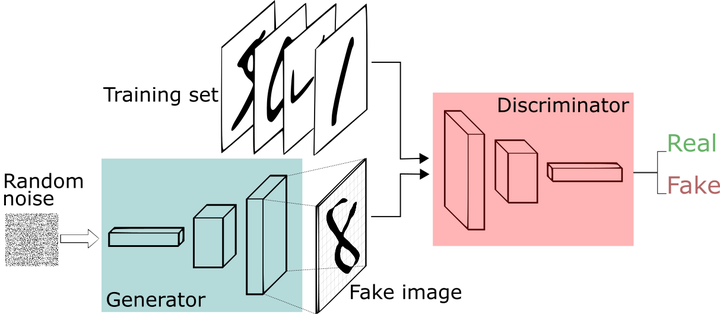

https://thispersondoesnotexist.com/ <br>
실제로 위 사이트에 접속해보면, 사람 얼굴 데이터셋으로 학습한 GAN으로 생성한 사람 얼굴 이미지가 있습니다!<br>

# 2. Why GANs?
- Training data가 불충분할 시에, GAN을 이용하여 데이터 증강이 가능합니다
- GAN을 통해 저화질의 사진 혹은 비디오를 고화질로 개선이 가능합니다
- Descriptions(text)만 가지고서 이미지들을 생성할 수 있습니다
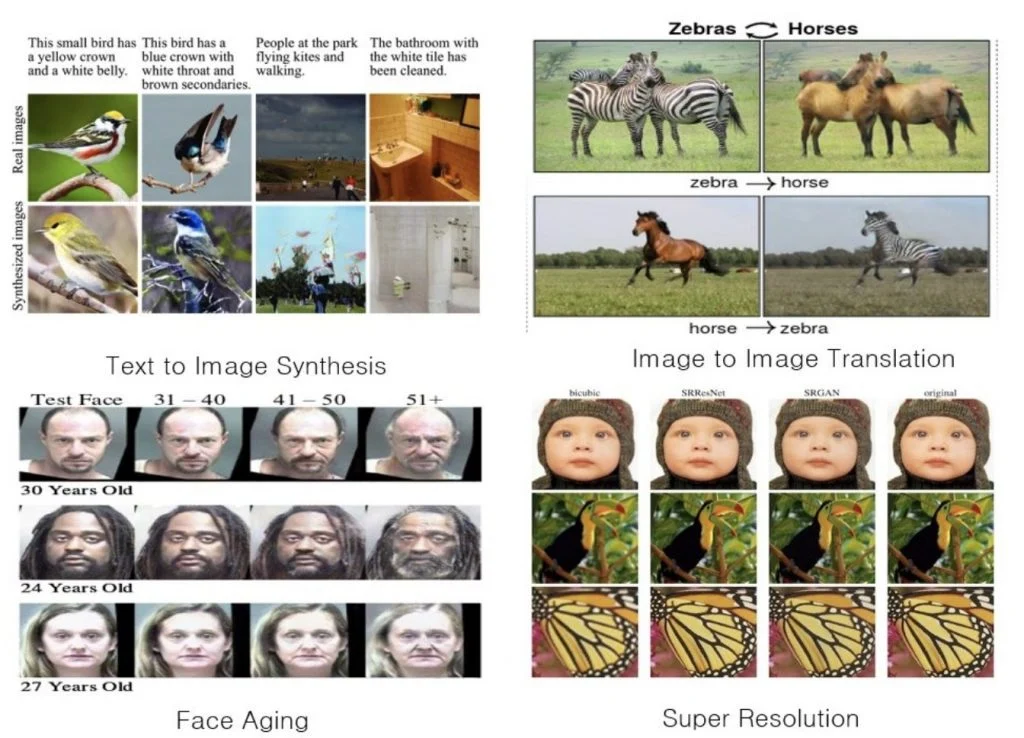

# 3. Advantages of GANs over Other Generative Models
요즈음 사용하는 생성 모델은 GAN이 지배하고 있습니다. 왜 그럴까요?
- GAN은 label이 필요없는 unsupervised 방식이므로, 학습하기 위한 라벨링이 따로 필요가 없습니다
- 기존의 생성모델은 흐릿한 이미지들을 생성했지만, GAN을 이용하면 보다 더 sharp한 이미지를 사용할 수 있습니다
- Backpropagation만을 사용하여 GAN 속의 2가지 네트워크를 학습할 수 있습니다

# 4. Intuition behind GANs

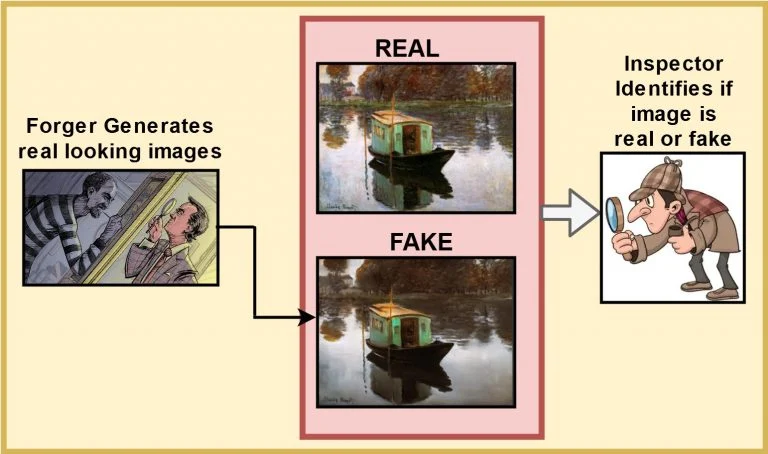<br>
- Generator는 위의 그림과 같이 실제 작품을 모방하려 합니다
- Discriminator는 작품이 real인지 fake인지 판단합니다. 또한 Generator가 더욱 더 realistic한 이미지들을 만들도록 feedback을 줍니다<br>
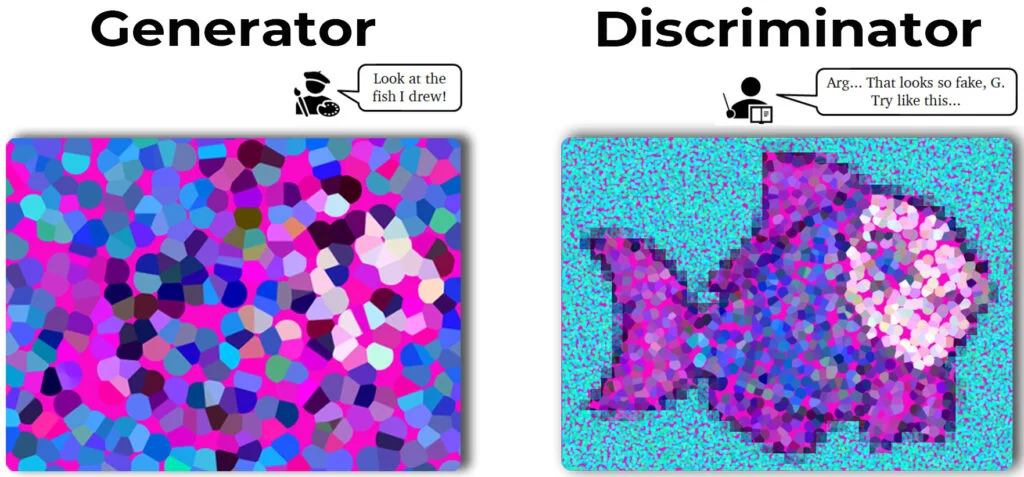 <br>

Generator와 Discriminator의 역할을 다시 한 번 정리하자면,<br>
- **Generator는 data의 distribution을 학습하고, random noise를 input으로 받아서, realistic한 이미지를 만들고자 합니다 <br>**
- **Discriminator는 주어진 sample이 실제 데이터셋인지, Generator에서 생성한 데이터인지 판단하는 역할을 합니다.<br>**

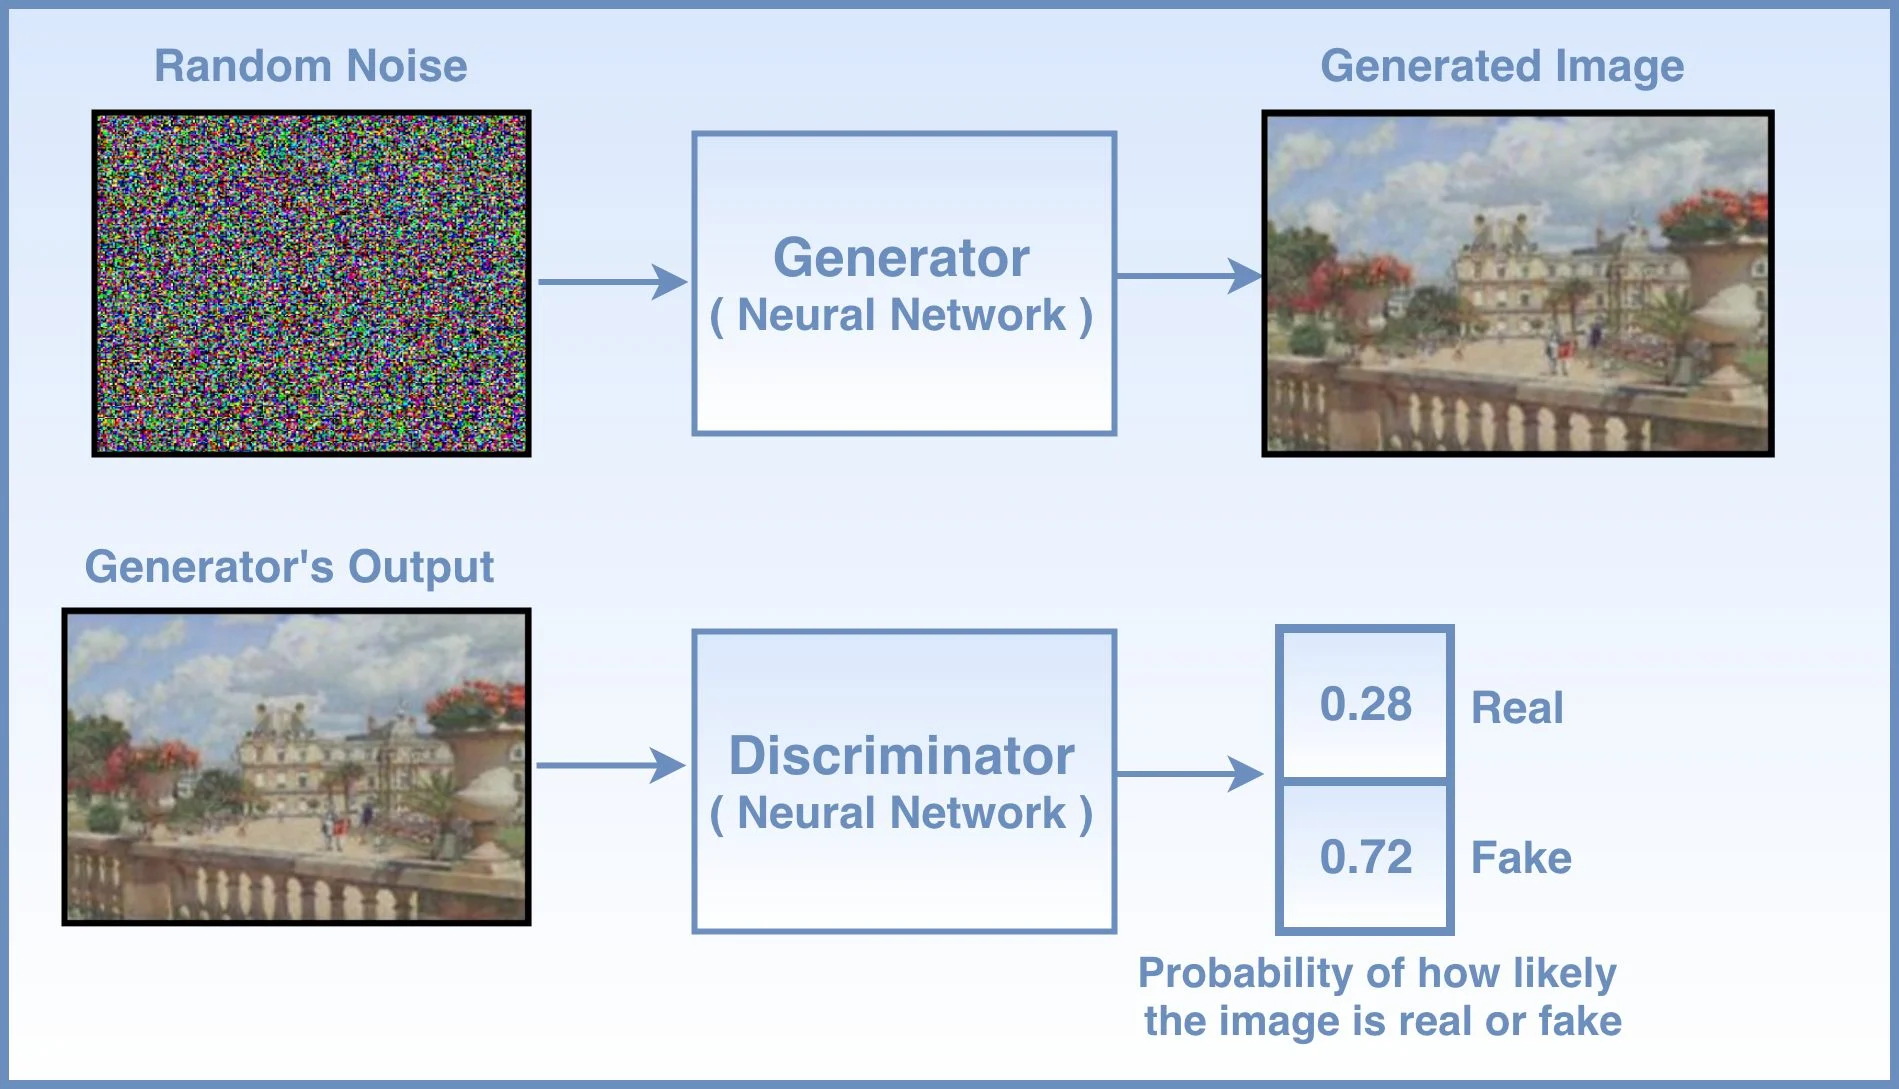 <br>

# 5. Components of a GAN

GAN의 아이디어는 생성 모델링 영역에 revolution이 되었습니다. Ian Goodfellow가 2014년 NIPs에서 처음 GAN에 관한 논문을 발표하였는데, 그는 GAN을 **"as a new framework for estimating generative models via an adversarial process, in which a generative model G captures the data distribution, while a discriminative model D estimates if the sample came from the training data rather than G"**로 소개하였습니다 <br>
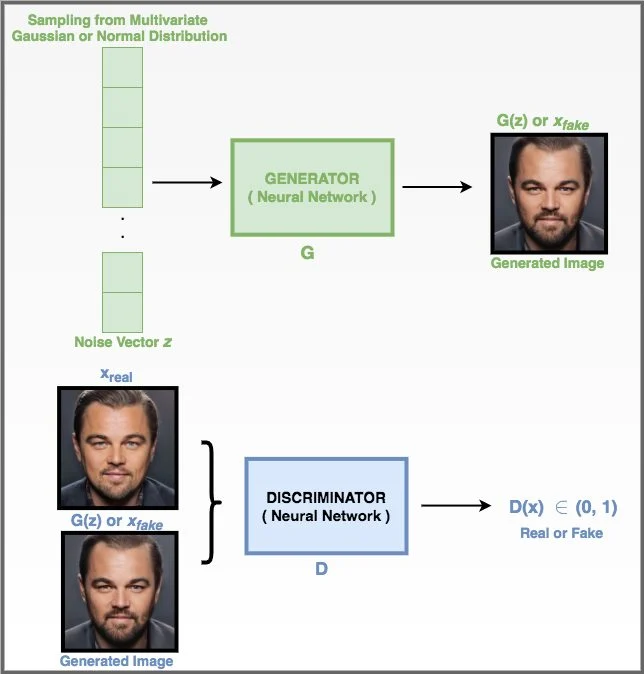 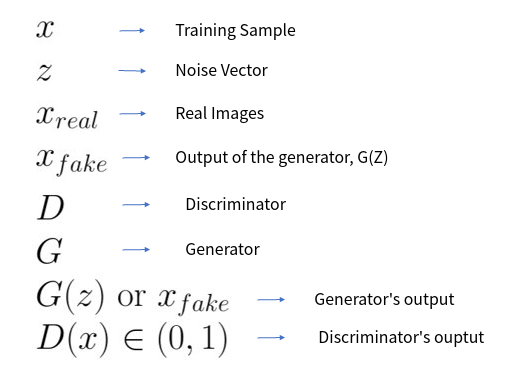<br>

Generator는 Discriminator를 속이려 하는 것이 목표이며, 반대로 Discriminator는 Generator가 생성한 이미지를 가짜로 판단하고, 실제 이미지를 실제로 판단하고자 하는 것이 목표입니다. 즉 이 둘의 목표가 정반대기에, **적대적(adversarial)**이라 부릅니다. <br>

## Generator
Generator는 신경망으로서, random set of values를 input으로 받아서, non-linear한 연산을 연속적으로 거쳐서 실제와 닮은 이미지를 생성합니다. 아래와 같이 Generator는 Z라는 mulivariate-gaussian distribution으로 부터 생성된 random vector를 입력으로 받아서, X(fake)라는 fake 이미지를 만들게 됩니다. 
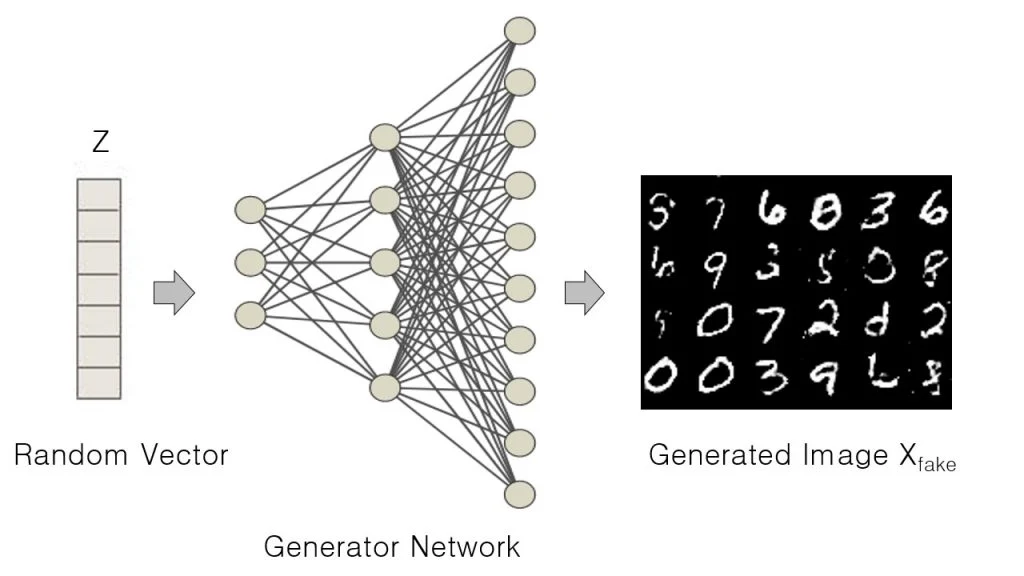

GAN을 통해 unsupervised한 문제를 해결하려 했을때, 우리의 목표는 특정한 클래스에 examples을 만드는 것입니다. 예를 들어서, 만약 우리가 강아지와 고양이 사진으로 GAN을 학습시켰을 때, 우리는 Generator가 2개의 class 모두로부터 이미지를 생성하는 것을 기대할 것입니다.

In [2]:
import torch
z = torch.randn(50)
print(z.mean(), z.var())

tensor(-0.0496) tensor(0.8976)


GAN의 입력값은 multivariate normal 혹은 gaussian distribution으로 셈플링된 랜덤한 값들을 사용하며, 사이즈는 실제 이미지와 같습니다. GAN의 generator는 latent space(특징 후보 공간)을 이미지에 추상적인 레벨로 투영시킨다는 점에서 VAE와 유사하지만, generator의 latent space는 가우시안 분포만을 배우도록 학습하지 않는다는 점에서 다름니다. 만약 가우시안만 학습하면 조금 더 복잡한 분포를 따를 수 있지만, mode collapse라는  문제점을 겪습니다. 

## Discriminator
Discriminator는 데이터셋을 특정 클래스로 분류하는 supervised-classification과 유사하지만, classification이 이미지 뿐만 아니라, 비디오, 텍스트, 다른 영역의 데이터를 사용한다는 점이 있습니다. 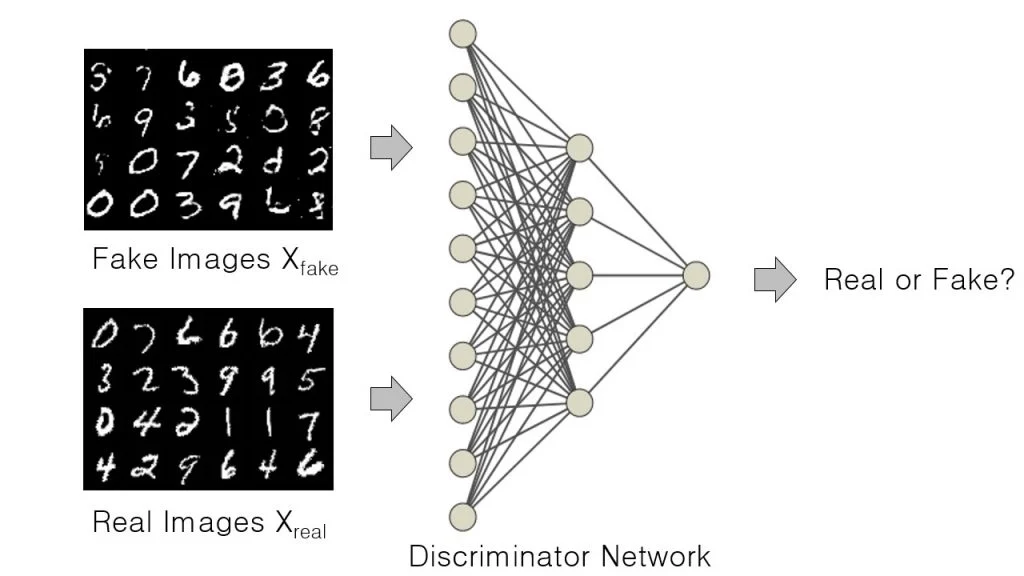 <br>
GAN에서 Discriminator는 실제와 fake 이미지를 분류하는 binary classification 문제를 해결합니다. fake/real data인지 예측하면서, 많은 파라미터를 학습하며, 학습이 진행될 동안 계속 업데이트가 됩니다. 초창기 GAN은 Dense Layer를 Discriminator에 사용하였는데, 2015년에 Deep Convolutional GAN (DCGAN)이 발표되면서, fully-connected layers보다는 convolutional layer가 잘 된다고 하였습니다. 

## Training procedure
먼저 첫번째 단계로
- 생성된 X(fake) 이미지들과 실제 이미지 X(real)들은 discriminator에 전달됩니다
- Discriminator는 확률값을 예측하며, 0:fake, 1:real인 label값과 비교되어, Binaary cross entropy 함수를 통과해 loss를 계산합니다
- **ss는 Backpropagation을 통해 discriminator만 먼저 학습하게 되며, discriminator의 파라미터들이 업데이트 됩니다**<br>

다음 단계로 
- Generator가 생성한 X_fake가 다시 discrminator에 전달됩니다
- 마찬가지로 Y_pred값이 계산되며, BCE를 통해 loss가 계산됩니다.
- Generator에서 생성한 이미지들을 discriminator가 실제로 판단하도록 속이기 위해서는 loss값이 generator만 backpropagation을 통해 학습되어 sutiable한 파라미터가 됩니다

Generator가 보다 더 사실적인 이미지들을 생성하기 위해서는, discriminator가 가이드를 해줘야 합니다.(fake images에 대한 loss값이 generator에 backpropagation되어야 합니다) 만약, discriminator가 약하면, 그럴 듯 하지 않은 이미지들도 real이라 판단할 수 있고, Generator가 약하면 discriminator를 속일만한 그럴 듯한 이미지들을 생성하지 못하기 때문에, 2개의 신경망 모두 강하게 학습시킬 필요가 있습니다.

## Objective function of GAN
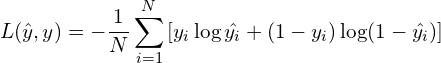
GAN의 loss함수로는 binary cross entropy를 사용합니다. 
> What is BCE?
- 식 맨처음의 (-) 부호는 loss가 음수가 되는 것을 막아줍니다. 신경망의 결과가 0~1사이의 값(확률)이므로, 이 값에 log를 취하면 음수값이 되므로, (-) 부호를 붙혀서 negative-log-likelihood를 사용합니다<br>
- 신경망은 batch단위로 학습을 진행하게 됩니다. N은 1 batch당 데이터 샘플 수이며, 전체 데이터 샘플 수를 N으로 나눠 배치 사이즈를 구하게 됩니다.<br>
- y(i)는 discriminator in GAN이 예측한 값이며, y(i_hat) 은 실제 label값입니다.<br>
- label이 1(real)일때는, 첫번째 항만 유효하지만, label이 0(fake)이면, 두번째 항만 유효하게 됩니다.<br>

이제 GAN에서 BCE가 어떤 의미를 갖는지 살펴보겠습니다.

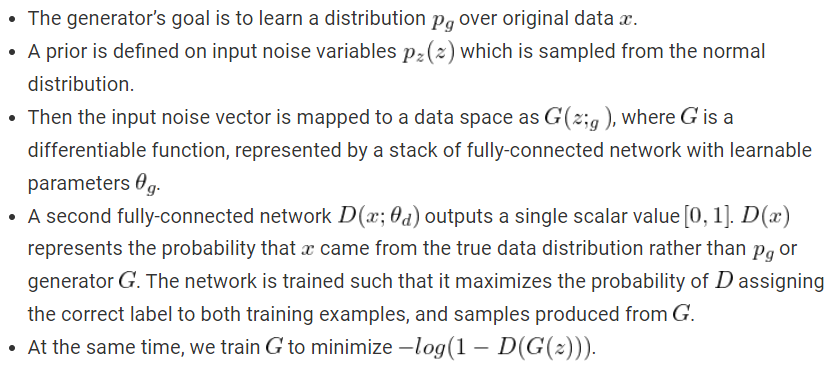

즉, **Discriminator는 실제 데이터를 1로, Generator에서 생성한 데이터를 0으로 분류하려고 하며, Generator는 Discriminator가 자신이 생성한 이미지를 1로 분류하는 것을 목표로 합니다**. D와 G는 결국에 two-player의 min-max game을 한다는 것입니다<br>
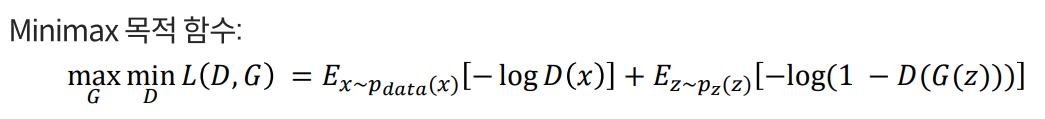






위는 논문에 제시된 loss함수 입니다. ``E[-logD(x)]``는 discriminator가 실제 데이터 x를 1의 확률에 가깝게 분류할수록, loss값은 작아지게 되지만, 반면에 이를 0(fake)에 가깝게 예측하면, loss가 증가하는 것으로 이해할 수 있습니다. 다음 항인 ``E[-log(1-D(G(z)))]``는 Generator가 생성한 이미지인 G(Z)를 D가 판단한 확률이 1(real)로 가까이 갈수록 loss가 증가하지만, 0(real)로 갈수록 loss값이 감소하게 됩니다. **즉, D의 입장에서는 G가 만든 이미지를 가짜(0)로 분류해야, loss가 줄어들게 될 것입니다. 반면에, G의 입장에서 ``E[-log(1-D(G(z)))]``는 D를 속이는 것이 목적이므로, D가 올바르게 분류할 수록 G가 제대로 만들고 있지 못한다는 의미이므로, 반대로 loss를 키워서 G에게 penalty를 부여할 것입니다.**  
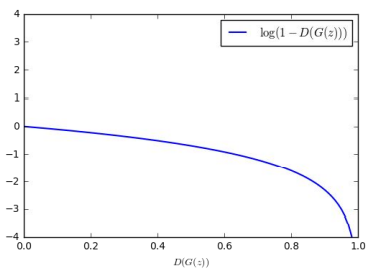

실제 학습시 Generator는 D(G(z))가 1(real) 이 되도록 학습을 진행할 텐데, 그래프를 보면 1로 가까울수록 오히려 loss함수의 graident값이 커져서 학습이 잘 안되는 상황이 발생합니다. 또한 0에서 시작할 것인데, 0근처에서의 gradient값이 매우 작아서도 학습이 잘 안될 것입니다. 이를 해결하고자 다음과 같이 trick을 써서 학습이 잘 되도록 합니다.   
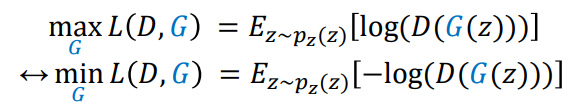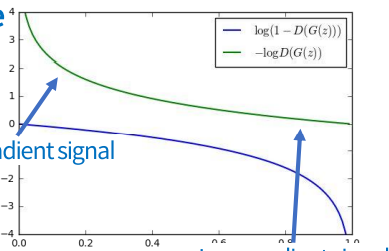
즉 위의 그래프를 보면, Generator입장에서 D(G(Z))가 0으로 갈수록 loss가 크고 gradient가 커지지만, 학습의 목표인 D(G(z))가 1로 가까워질수록 loss값도 줄어들면서 gradient값도 줄어들어 안정적으로 학습하는 것을 알 수 있습니다.

GAN의 전체 학습과정에 대한 pseudo-code는 다음과 같습니다
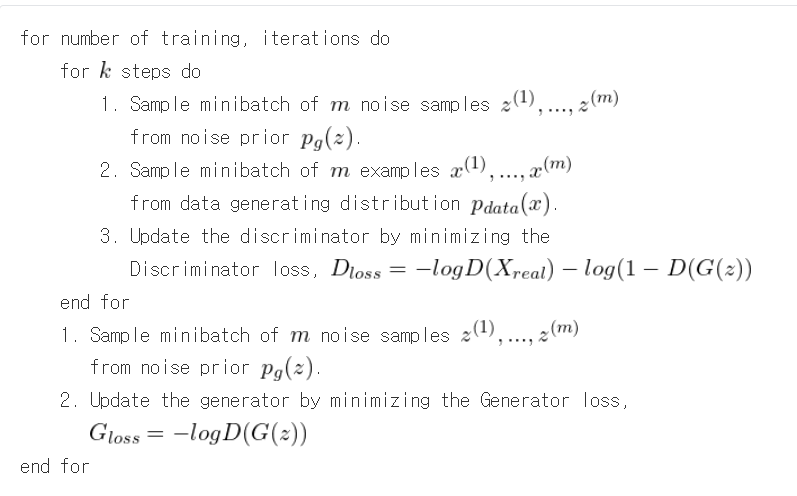

# 6. Pytorch Implementation

## Dataset
Fashion-MNIST dataset을 이용하여 GAN을 실습해 보겠습니다.
> Fashion-MNIST
- Database of 60,000 fashion images 
- Each image of size 28×28 ( grayscale ) is associated with a label from 10 categories like t-shirt, trouser, sneaker, etc.<br>
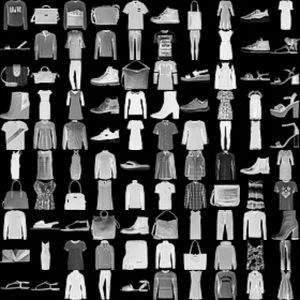

## Import module

In [1]:
import os
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])
train_dataset = datasets.FashionMNIST(root='./data/', train=True, transform=train_transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

C:\Users\wilko\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## HyperParameter Setting

In [3]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

In [4]:
config = AttrDict()
config.data_path = 'data/'
config.save_path = 'save/'
config.dataset = 'FashionMNIST' #FashionMNIST
config.n_epoch = 500
config.log_interval = 100
config.save_interval = 20
config.batch_size = 64
config.learning_rate = 0.0002
# Momentum update for Adam optimizer
config.b1 = 0.5 
config.b2 = 0.999  
config.img_shape = (1, 32, 32) # FahsionMNIST is grayscale images
config.latent_size = 100 # Random noise's dimension
config.augmentation = transforms.Compose([
                        transforms.Resize((config.img_shape[1], config.img_shape[2])), # Resize (28, 28) -> (32, 32)
                        transforms.ToTensor(), # image to Tensor
                        transforms.Normalize(mean=[0.5], std=[0.5]) # Normalize inputs
                      ]) 
config.denormalize = lambda x: x*0.5+0.5 # Denormalize outputs for visualization
config.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU setting

In [5]:
# Creating Folder for dataset
if not os.path.isdir(config.data_path):
    os.makedirs(config.data_path)
if not os.path.isdir(os.path.join(config.save_path, config.dataset)):
    os.makedirs(os.path.join(config.save_path, config.dataset))

In [6]:
# Check GPU opr CPU
config.device

device(type='cuda')

## HyperParameter Setting

In [7]:
train_dataset = datasets.FashionMNIST(
    config.data_path,
    train = True,
    download = True,
    transform = config.augmentation
)

In [8]:
# DataLoader -> Makes dataset into mini-batches
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)

## GAN
- Leaky ReLu : loss가 D에서 G로 back propagation이 일어날 때, vanishing gradient를 완화하기 위해 사용

In [9]:
class Generator(nn.Module):
    def __init__(self, config):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            *self.block(config.latent_size, 128, batchnorm=False),
            *self.block(128, 256),
            *self.block(256, 512),
            *self.block(512, 1024),
            nn.Linear(1024, int(np.prod(config.img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.reshape(img.shape[0], *config.img_shape)
        return img
    
    def block(self, input_size, output_size, batchnorm=True):
        layers = [nn.Linear(input_size, output_size)]
        if batchnorm:
            layers.append(nn.BatchNorm1d(output_size))
        layers.append(nn.LeakyReLU(0.2, inplace=True))
        return layers

In [10]:
class Discriminator(nn.Module):
    def __init__(self, config):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(config.img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img = img.reshape(img.shape[0], -1)
        validity = self.model(img)
        return validity      

## Optimzier and Loss_func

In [11]:
criterion = nn.BCELoss()
generator = Generator(config).to(config.device)
discriminator = Discriminator(config).to(config.device)

optimizer_g = torch.optim.Adam(generator.parameters(), lr=config.learning_rate, betas=(config.b1, config.b2))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=config.learning_rate, betas=(config.b1, config.b2))

## Train Generator and Discriminator

In [46]:
g_loss_list = []
d_loss_list = []

for epoch in tqdm(range(config.n_epoch)):
    for i, (real_img, _) in enumerate(train_loader):
        
        real_img = real_img.to(config.device)
        """
        adversarial loss에 사용될 ground truth들입니다.
        Discriminator에게 있어 실제 이미지는 1, generator가 생성한 fake 이미지는 0을 label로 합니다.
        반대로 Generator는 자신이 생성한 fake 이미지의 label이 1이 되게 하여 Discriminator를 fooling 합니다.
        """ 
        # real_img.shape[0] -> batch_size
        valid_label = torch.ones((real_img.shape[0], 1), device=config.device, dtype=torch.float32)
        fake_label = torch.zeros((real_img.shape[0], 1), device=config.device, dtype=torch.float32)
        
        """
        Gaussian random noise를 Generator에게 입력하여 fake 이미지들을 생성합니다.
        """
        z = torch.randn((real_img.shape[0], config.latent_size), device=config.device, dtype=torch.float32)
        gen_img = generator(z)
        """
        Discriminator가 실제 이미지와 Generator가 생성한 이미지를 잘 구별하는지 loss를 계산합니다.
        이 때, Generator는 현재 계산된 loss로 학습되지 않으므로, 
        detach() 함수를 이용하여 생성 이미지를 computation graph에서 분리한 후 Discriminator의 입력으로 넣어줍니다. 
        """
        real_loss = criterion(discriminator(real_img), valid_label)
        fake_loss = criterion(discriminator(gen_img.detach()), fake_label)
        d_loss = (real_loss + fake_loss) * 0.5
        
        """
        Discriminator를 업데이트합니다.
        """
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # ====================================================#
        #                   Train Generator                   #
        # ====================================================#

        """
        Gaussian random noise를 Generator에게 입력하여 fake 이미지들을 생성합니다.
        """
        z = torch.randn((real_img.shape[0], config.latent_size), device=config.device, dtype=torch.float32)
        gen_img = generator(z)

        """
        Generator가 Discriminator를 속일 수 있는지 loss를 계산합니다.
        """
        g_loss = criterion(discriminator(gen_img), valid_label)
        
        """
        Generator를 업데이트합니다.
        """
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

        if (i+1) % config.log_interval == 0:
            g_loss_list.append(g_loss.item())
            d_loss_list.append(d_loss.item())
            print('Epoch [{}/{}] Batch [{}/{}] Discriminator loss: {:.4f} Generator loss: {:.4f}'.format(
                epoch+1, config.n_epoch, i+1, len(train_loader), d_loss.item(), g_loss.item()))

    if (epoch+1) % config.save_interval == 0:
        save_path = os.path.join(config.save_path, config.dataset, 'epoch_[{}].png'.format(epoch+1))
        gen_img = config.denormalize(gen_img)
        torchvision.utils.save_image(gen_img.data[:25], save_path, nrow=5, normalize=True)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/500] Batch [100/938] Discriminator loss: 0.2325 Generator loss: 2.8826
Epoch [1/500] Batch [200/938] Discriminator loss: 0.2301 Generator loss: 2.8940
Epoch [1/500] Batch [300/938] Discriminator loss: 0.2925 Generator loss: 2.6345
Epoch [1/500] Batch [400/938] Discriminator loss: 0.2805 Generator loss: 1.4662
Epoch [1/500] Batch [500/938] Discriminator loss: 0.3207 Generator loss: 1.4996
Epoch [1/500] Batch [600/938] Discriminator loss: 0.2842 Generator loss: 2.7546
Epoch [1/500] Batch [700/938] Discriminator loss: 0.3121 Generator loss: 3.0375
Epoch [1/500] Batch [800/938] Discriminator loss: 0.3461 Generator loss: 3.2434
Epoch [1/500] Batch [900/938] Discriminator loss: 0.2764 Generator loss: 2.4153
Epoch [2/500] Batch [100/938] Discriminator loss: 0.2859 Generator loss: 2.3941
Epoch [2/500] Batch [200/938] Discriminator loss: 0.1901 Generator loss: 3.7980
Epoch [2/500] Batch [300/938] Discriminator loss: 0.3606 Generator loss: 1.3211
Epoch [2/500] Batch [400/938] Discrimina

Epoch [12/500] Batch [500/938] Discriminator loss: 0.3840 Generator loss: 3.0258
Epoch [12/500] Batch [600/938] Discriminator loss: 0.2109 Generator loss: 3.0543
Epoch [12/500] Batch [700/938] Discriminator loss: 0.1887 Generator loss: 2.9384
Epoch [12/500] Batch [800/938] Discriminator loss: 0.2458 Generator loss: 1.7987
Epoch [12/500] Batch [900/938] Discriminator loss: 0.3363 Generator loss: 2.0984
Epoch [13/500] Batch [100/938] Discriminator loss: 0.2439 Generator loss: 2.5834
Epoch [13/500] Batch [200/938] Discriminator loss: 0.2981 Generator loss: 2.2943
Epoch [13/500] Batch [300/938] Discriminator loss: 0.3130 Generator loss: 2.0090
Epoch [13/500] Batch [400/938] Discriminator loss: 0.2944 Generator loss: 1.8765
Epoch [13/500] Batch [500/938] Discriminator loss: 0.2831 Generator loss: 2.2111
Epoch [13/500] Batch [600/938] Discriminator loss: 0.2626 Generator loss: 2.2336
Epoch [13/500] Batch [700/938] Discriminator loss: 0.2409 Generator loss: 2.6506
Epoch [13/500] Batch [800/93

Epoch [23/500] Batch [800/938] Discriminator loss: 0.3062 Generator loss: 2.4858
Epoch [23/500] Batch [900/938] Discriminator loss: 0.2275 Generator loss: 2.7018
Epoch [24/500] Batch [100/938] Discriminator loss: 0.2791 Generator loss: 1.9892
Epoch [24/500] Batch [200/938] Discriminator loss: 0.3510 Generator loss: 1.9642
Epoch [24/500] Batch [300/938] Discriminator loss: 0.2368 Generator loss: 2.4478
Epoch [24/500] Batch [400/938] Discriminator loss: 0.2590 Generator loss: 1.8047
Epoch [24/500] Batch [500/938] Discriminator loss: 0.3535 Generator loss: 2.5374
Epoch [24/500] Batch [600/938] Discriminator loss: 0.1940 Generator loss: 3.2880
Epoch [24/500] Batch [700/938] Discriminator loss: 0.2371 Generator loss: 2.0002
Epoch [24/500] Batch [800/938] Discriminator loss: 0.1992 Generator loss: 2.5617
Epoch [24/500] Batch [900/938] Discriminator loss: 0.2917 Generator loss: 1.8464
Epoch [25/500] Batch [100/938] Discriminator loss: 0.2581 Generator loss: 2.4988
Epoch [25/500] Batch [200/93

Epoch [35/500] Batch [200/938] Discriminator loss: 0.2843 Generator loss: 4.1607
Epoch [35/500] Batch [300/938] Discriminator loss: 0.2845 Generator loss: 3.1297
Epoch [35/500] Batch [400/938] Discriminator loss: 0.2417 Generator loss: 2.6967
Epoch [35/500] Batch [500/938] Discriminator loss: 0.2199 Generator loss: 3.0847
Epoch [35/500] Batch [600/938] Discriminator loss: 0.3133 Generator loss: 2.7766
Epoch [35/500] Batch [700/938] Discriminator loss: 0.2752 Generator loss: 2.5552
Epoch [35/500] Batch [800/938] Discriminator loss: 0.2556 Generator loss: 3.7299
Epoch [35/500] Batch [900/938] Discriminator loss: 0.2295 Generator loss: 2.7911
Epoch [36/500] Batch [100/938] Discriminator loss: 0.2723 Generator loss: 2.8309
Epoch [36/500] Batch [200/938] Discriminator loss: 0.2245 Generator loss: 2.7065
Epoch [36/500] Batch [300/938] Discriminator loss: 0.2634 Generator loss: 2.7388
Epoch [36/500] Batch [400/938] Discriminator loss: 0.4395 Generator loss: 1.9475
Epoch [36/500] Batch [500/93

Epoch [46/500] Batch [500/938] Discriminator loss: 0.2617 Generator loss: 2.2614
Epoch [46/500] Batch [600/938] Discriminator loss: 0.2081 Generator loss: 3.2180
Epoch [46/500] Batch [700/938] Discriminator loss: 0.3206 Generator loss: 3.0051
Epoch [46/500] Batch [800/938] Discriminator loss: 0.2172 Generator loss: 2.6877
Epoch [46/500] Batch [900/938] Discriminator loss: 0.2971 Generator loss: 2.1631
Epoch [47/500] Batch [100/938] Discriminator loss: 0.2788 Generator loss: 2.5038
Epoch [47/500] Batch [200/938] Discriminator loss: 0.3328 Generator loss: 2.4169
Epoch [47/500] Batch [300/938] Discriminator loss: 0.3674 Generator loss: 3.7675
Epoch [47/500] Batch [400/938] Discriminator loss: 0.1918 Generator loss: 2.2314
Epoch [47/500] Batch [500/938] Discriminator loss: 0.2697 Generator loss: 3.7593
Epoch [47/500] Batch [600/938] Discriminator loss: 0.2197 Generator loss: 3.3599
Epoch [47/500] Batch [700/938] Discriminator loss: 0.3740 Generator loss: 1.6243
Epoch [47/500] Batch [800/93

Epoch [57/500] Batch [800/938] Discriminator loss: 0.2218 Generator loss: 4.2970
Epoch [57/500] Batch [900/938] Discriminator loss: 0.1893 Generator loss: 2.9871
Epoch [58/500] Batch [100/938] Discriminator loss: 0.3212 Generator loss: 2.0677
Epoch [58/500] Batch [200/938] Discriminator loss: 0.4256 Generator loss: 1.8743
Epoch [58/500] Batch [300/938] Discriminator loss: 0.2799 Generator loss: 2.5709
Epoch [58/500] Batch [400/938] Discriminator loss: 0.3293 Generator loss: 1.6702
Epoch [58/500] Batch [500/938] Discriminator loss: 0.2782 Generator loss: 1.8899
Epoch [58/500] Batch [600/938] Discriminator loss: 0.2321 Generator loss: 2.0234
Epoch [58/500] Batch [700/938] Discriminator loss: 0.2858 Generator loss: 2.7361
Epoch [58/500] Batch [800/938] Discriminator loss: 0.2795 Generator loss: 2.8548
Epoch [58/500] Batch [900/938] Discriminator loss: 0.2521 Generator loss: 2.2355
Epoch [59/500] Batch [100/938] Discriminator loss: 0.2748 Generator loss: 2.5488
Epoch [59/500] Batch [200/93

Epoch [69/500] Batch [200/938] Discriminator loss: 0.2419 Generator loss: 1.9275
Epoch [69/500] Batch [300/938] Discriminator loss: 0.2688 Generator loss: 2.4915
Epoch [69/500] Batch [400/938] Discriminator loss: 0.3029 Generator loss: 1.8328
Epoch [69/500] Batch [500/938] Discriminator loss: 0.2690 Generator loss: 3.5162
Epoch [69/500] Batch [600/938] Discriminator loss: 0.2185 Generator loss: 2.0708
Epoch [69/500] Batch [700/938] Discriminator loss: 0.2572 Generator loss: 1.7005
Epoch [69/500] Batch [800/938] Discriminator loss: 0.3510 Generator loss: 1.9599
Epoch [69/500] Batch [900/938] Discriminator loss: 0.2877 Generator loss: 3.5876
Epoch [70/500] Batch [100/938] Discriminator loss: 0.2419 Generator loss: 2.5373
Epoch [70/500] Batch [200/938] Discriminator loss: 0.3035 Generator loss: 2.6207
Epoch [70/500] Batch [300/938] Discriminator loss: 0.2417 Generator loss: 4.0636
Epoch [70/500] Batch [400/938] Discriminator loss: 0.3059 Generator loss: 4.3477
Epoch [70/500] Batch [500/93

Epoch [80/500] Batch [500/938] Discriminator loss: 0.2692 Generator loss: 2.5999
Epoch [80/500] Batch [600/938] Discriminator loss: 0.2538 Generator loss: 2.0728
Epoch [80/500] Batch [700/938] Discriminator loss: 0.2126 Generator loss: 2.5866
Epoch [80/500] Batch [800/938] Discriminator loss: 0.2661 Generator loss: 2.4822
Epoch [80/500] Batch [900/938] Discriminator loss: 0.2569 Generator loss: 2.1101
Epoch [81/500] Batch [100/938] Discriminator loss: 0.2680 Generator loss: 1.9215
Epoch [81/500] Batch [200/938] Discriminator loss: 0.3217 Generator loss: 1.1441
Epoch [81/500] Batch [300/938] Discriminator loss: 0.3143 Generator loss: 2.4019
Epoch [81/500] Batch [400/938] Discriminator loss: 0.2007 Generator loss: 3.1255
Epoch [81/500] Batch [500/938] Discriminator loss: 0.2712 Generator loss: 3.0575
Epoch [81/500] Batch [600/938] Discriminator loss: 0.2410 Generator loss: 2.1711
Epoch [81/500] Batch [700/938] Discriminator loss: 0.2445 Generator loss: 3.0455
Epoch [81/500] Batch [800/93

Epoch [91/500] Batch [800/938] Discriminator loss: 0.3525 Generator loss: 1.4662
Epoch [91/500] Batch [900/938] Discriminator loss: 0.5456 Generator loss: 2.4552
Epoch [92/500] Batch [100/938] Discriminator loss: 0.1983 Generator loss: 3.0155
Epoch [92/500] Batch [200/938] Discriminator loss: 0.2636 Generator loss: 2.5243
Epoch [92/500] Batch [300/938] Discriminator loss: 0.1969 Generator loss: 2.7810
Epoch [92/500] Batch [400/938] Discriminator loss: 0.2219 Generator loss: 3.7849
Epoch [92/500] Batch [500/938] Discriminator loss: 0.4144 Generator loss: 1.7389
Epoch [92/500] Batch [600/938] Discriminator loss: 0.2685 Generator loss: 2.1530
Epoch [92/500] Batch [700/938] Discriminator loss: 0.2451 Generator loss: 3.0852
Epoch [92/500] Batch [800/938] Discriminator loss: 0.1550 Generator loss: 2.6697
Epoch [92/500] Batch [900/938] Discriminator loss: 0.3330 Generator loss: 3.9119
Epoch [93/500] Batch [100/938] Discriminator loss: 0.2204 Generator loss: 3.7199
Epoch [93/500] Batch [200/93

Epoch [103/500] Batch [100/938] Discriminator loss: 0.1775 Generator loss: 2.1527
Epoch [103/500] Batch [200/938] Discriminator loss: 0.2651 Generator loss: 4.1539
Epoch [103/500] Batch [300/938] Discriminator loss: 0.1779 Generator loss: 2.8225
Epoch [103/500] Batch [400/938] Discriminator loss: 0.2374 Generator loss: 2.4425
Epoch [103/500] Batch [500/938] Discriminator loss: 0.2976 Generator loss: 1.2844
Epoch [103/500] Batch [600/938] Discriminator loss: 0.2053 Generator loss: 4.0408
Epoch [103/500] Batch [700/938] Discriminator loss: 0.2855 Generator loss: 3.9255
Epoch [103/500] Batch [800/938] Discriminator loss: 0.2418 Generator loss: 2.1695
Epoch [103/500] Batch [900/938] Discriminator loss: 0.1992 Generator loss: 2.3615
Epoch [104/500] Batch [100/938] Discriminator loss: 0.1950 Generator loss: 3.3873
Epoch [104/500] Batch [200/938] Discriminator loss: 0.3046 Generator loss: 1.3018
Epoch [104/500] Batch [300/938] Discriminator loss: 0.2254 Generator loss: 1.8845
Epoch [104/500] 

Epoch [114/500] Batch [200/938] Discriminator loss: 0.2566 Generator loss: 2.5652
Epoch [114/500] Batch [300/938] Discriminator loss: 0.2556 Generator loss: 1.6458
Epoch [114/500] Batch [400/938] Discriminator loss: 0.1988 Generator loss: 3.5411
Epoch [114/500] Batch [500/938] Discriminator loss: 0.2358 Generator loss: 2.4549
Epoch [114/500] Batch [600/938] Discriminator loss: 0.2390 Generator loss: 2.9174
Epoch [114/500] Batch [700/938] Discriminator loss: 0.1852 Generator loss: 2.5155
Epoch [114/500] Batch [800/938] Discriminator loss: 0.2288 Generator loss: 3.0513
Epoch [114/500] Batch [900/938] Discriminator loss: 0.2556 Generator loss: 3.9761
Epoch [115/500] Batch [100/938] Discriminator loss: 0.2581 Generator loss: 3.2373
Epoch [115/500] Batch [200/938] Discriminator loss: 0.2377 Generator loss: 2.0190
Epoch [115/500] Batch [300/938] Discriminator loss: 0.1992 Generator loss: 1.7325
Epoch [115/500] Batch [400/938] Discriminator loss: 0.1947 Generator loss: 2.4494
Epoch [115/500] 

Epoch [125/500] Batch [300/938] Discriminator loss: 0.1283 Generator loss: 3.9372
Epoch [125/500] Batch [400/938] Discriminator loss: 0.1933 Generator loss: 1.7175
Epoch [125/500] Batch [500/938] Discriminator loss: 0.2293 Generator loss: 2.5848
Epoch [125/500] Batch [600/938] Discriminator loss: 0.1973 Generator loss: 3.0956
Epoch [125/500] Batch [700/938] Discriminator loss: 0.2084 Generator loss: 2.7831
Epoch [125/500] Batch [800/938] Discriminator loss: 0.2137 Generator loss: 2.6561
Epoch [125/500] Batch [900/938] Discriminator loss: 0.1562 Generator loss: 2.8967
Epoch [126/500] Batch [100/938] Discriminator loss: 0.2213 Generator loss: 3.3791
Epoch [126/500] Batch [200/938] Discriminator loss: 0.3365 Generator loss: 2.0655
Epoch [126/500] Batch [300/938] Discriminator loss: 0.1810 Generator loss: 3.0807
Epoch [126/500] Batch [400/938] Discriminator loss: 0.3756 Generator loss: 2.5384
Epoch [126/500] Batch [500/938] Discriminator loss: 0.2622 Generator loss: 1.8926
Epoch [126/500] 

Epoch [136/500] Batch [400/938] Discriminator loss: 0.2104 Generator loss: 1.9574
Epoch [136/500] Batch [500/938] Discriminator loss: 0.1745 Generator loss: 2.5448
Epoch [136/500] Batch [600/938] Discriminator loss: 0.1790 Generator loss: 2.5494
Epoch [136/500] Batch [700/938] Discriminator loss: 0.2708 Generator loss: 3.1046
Epoch [136/500] Batch [800/938] Discriminator loss: 0.1801 Generator loss: 3.9925
Epoch [136/500] Batch [900/938] Discriminator loss: 0.1924 Generator loss: 3.2261
Epoch [137/500] Batch [100/938] Discriminator loss: 0.1655 Generator loss: 2.8497
Epoch [137/500] Batch [200/938] Discriminator loss: 0.2391 Generator loss: 3.8894
Epoch [137/500] Batch [300/938] Discriminator loss: 0.1913 Generator loss: 1.8588
Epoch [137/500] Batch [400/938] Discriminator loss: 0.2551 Generator loss: 2.8355
Epoch [137/500] Batch [500/938] Discriminator loss: 0.3113 Generator loss: 2.9128
Epoch [137/500] Batch [600/938] Discriminator loss: 0.2860 Generator loss: 0.8277
Epoch [137/500] 

Epoch [147/500] Batch [500/938] Discriminator loss: 0.2869 Generator loss: 1.9535
Epoch [147/500] Batch [600/938] Discriminator loss: 0.2116 Generator loss: 2.7214
Epoch [147/500] Batch [700/938] Discriminator loss: 0.2803 Generator loss: 2.4490
Epoch [147/500] Batch [800/938] Discriminator loss: 0.2995 Generator loss: 2.2306
Epoch [147/500] Batch [900/938] Discriminator loss: 0.2337 Generator loss: 3.4052
Epoch [148/500] Batch [100/938] Discriminator loss: 0.1493 Generator loss: 3.2637
Epoch [148/500] Batch [200/938] Discriminator loss: 0.3076 Generator loss: 1.6811
Epoch [148/500] Batch [300/938] Discriminator loss: 0.2463 Generator loss: 3.1188
Epoch [148/500] Batch [400/938] Discriminator loss: 0.1812 Generator loss: 2.7776
Epoch [148/500] Batch [500/938] Discriminator loss: 0.1867 Generator loss: 4.0200
Epoch [148/500] Batch [600/938] Discriminator loss: 0.1585 Generator loss: 3.2340
Epoch [148/500] Batch [700/938] Discriminator loss: 0.1871 Generator loss: 2.4035
Epoch [148/500] 

Epoch [158/500] Batch [600/938] Discriminator loss: 0.3446 Generator loss: 2.4441
Epoch [158/500] Batch [700/938] Discriminator loss: 0.2158 Generator loss: 2.6597
Epoch [158/500] Batch [800/938] Discriminator loss: 0.2742 Generator loss: 3.4212
Epoch [158/500] Batch [900/938] Discriminator loss: 0.3110 Generator loss: 2.4834
Epoch [159/500] Batch [100/938] Discriminator loss: 0.1970 Generator loss: 2.9411
Epoch [159/500] Batch [200/938] Discriminator loss: 0.2476 Generator loss: 2.5344
Epoch [159/500] Batch [300/938] Discriminator loss: 0.3571 Generator loss: 1.7090
Epoch [159/500] Batch [400/938] Discriminator loss: 0.2035 Generator loss: 2.4170
Epoch [159/500] Batch [500/938] Discriminator loss: 0.1872 Generator loss: 2.1962
Epoch [159/500] Batch [600/938] Discriminator loss: 0.2754 Generator loss: 2.1937
Epoch [159/500] Batch [700/938] Discriminator loss: 0.2137 Generator loss: 1.8395
Epoch [159/500] Batch [800/938] Discriminator loss: 0.2410 Generator loss: 3.4243
Epoch [159/500] 

Epoch [169/500] Batch [700/938] Discriminator loss: 0.1716 Generator loss: 2.9738
Epoch [169/500] Batch [800/938] Discriminator loss: 0.1904 Generator loss: 3.1493
Epoch [169/500] Batch [900/938] Discriminator loss: 0.1171 Generator loss: 3.4312
Epoch [170/500] Batch [100/938] Discriminator loss: 0.2345 Generator loss: 3.4960
Epoch [170/500] Batch [200/938] Discriminator loss: 0.2083 Generator loss: 3.5679
Epoch [170/500] Batch [300/938] Discriminator loss: 0.3714 Generator loss: 2.0986
Epoch [170/500] Batch [400/938] Discriminator loss: 0.1525 Generator loss: 2.3370
Epoch [170/500] Batch [500/938] Discriminator loss: 0.2056 Generator loss: 3.2169
Epoch [170/500] Batch [600/938] Discriminator loss: 0.1988 Generator loss: 1.9747
Epoch [170/500] Batch [700/938] Discriminator loss: 0.1425 Generator loss: 2.4591
Epoch [170/500] Batch [800/938] Discriminator loss: 0.3399 Generator loss: 2.8501
Epoch [170/500] Batch [900/938] Discriminator loss: 0.2600 Generator loss: 2.8637
Epoch [171/500] 

Epoch [180/500] Batch [800/938] Discriminator loss: 0.3169 Generator loss: 3.0685
Epoch [180/500] Batch [900/938] Discriminator loss: 0.2627 Generator loss: 2.4556
Epoch [181/500] Batch [100/938] Discriminator loss: 0.1327 Generator loss: 2.5246
Epoch [181/500] Batch [200/938] Discriminator loss: 0.2166 Generator loss: 3.0834
Epoch [181/500] Batch [300/938] Discriminator loss: 0.2437 Generator loss: 2.2732
Epoch [181/500] Batch [400/938] Discriminator loss: 0.3230 Generator loss: 1.9536
Epoch [181/500] Batch [500/938] Discriminator loss: 0.2400 Generator loss: 1.7942
Epoch [181/500] Batch [600/938] Discriminator loss: 0.2259 Generator loss: 3.3394
Epoch [181/500] Batch [700/938] Discriminator loss: 0.2463 Generator loss: 4.1137
Epoch [181/500] Batch [800/938] Discriminator loss: 0.1714 Generator loss: 2.3893
Epoch [181/500] Batch [900/938] Discriminator loss: 0.2735 Generator loss: 2.7769
Epoch [182/500] Batch [100/938] Discriminator loss: 0.1884 Generator loss: 3.4369
Epoch [182/500] 

Epoch [191/500] Batch [900/938] Discriminator loss: 0.1697 Generator loss: 2.8657
Epoch [192/500] Batch [100/938] Discriminator loss: 0.2725 Generator loss: 3.2446
Epoch [192/500] Batch [200/938] Discriminator loss: 0.2032 Generator loss: 4.1256
Epoch [192/500] Batch [300/938] Discriminator loss: 0.2207 Generator loss: 2.1869
Epoch [192/500] Batch [400/938] Discriminator loss: 0.2131 Generator loss: 2.7830
Epoch [192/500] Batch [500/938] Discriminator loss: 0.1785 Generator loss: 3.1763
Epoch [192/500] Batch [600/938] Discriminator loss: 0.1824 Generator loss: 4.5592
Epoch [192/500] Batch [700/938] Discriminator loss: 0.2031 Generator loss: 2.5527
Epoch [192/500] Batch [800/938] Discriminator loss: 0.1886 Generator loss: 2.8074
Epoch [192/500] Batch [900/938] Discriminator loss: 0.3023 Generator loss: 3.3938
Epoch [193/500] Batch [100/938] Discriminator loss: 0.2064 Generator loss: 2.7142
Epoch [193/500] Batch [200/938] Discriminator loss: 0.2560 Generator loss: 3.5427
Epoch [193/500] 

Epoch [203/500] Batch [100/938] Discriminator loss: 0.1630 Generator loss: 3.3515
Epoch [203/500] Batch [200/938] Discriminator loss: 0.1883 Generator loss: 2.7659
Epoch [203/500] Batch [300/938] Discriminator loss: 0.2370 Generator loss: 2.2943
Epoch [203/500] Batch [400/938] Discriminator loss: 0.3181 Generator loss: 2.9779
Epoch [203/500] Batch [500/938] Discriminator loss: 0.2041 Generator loss: 3.1963
Epoch [203/500] Batch [600/938] Discriminator loss: 0.2535 Generator loss: 2.9154
Epoch [203/500] Batch [700/938] Discriminator loss: 0.1613 Generator loss: 3.6031
Epoch [203/500] Batch [800/938] Discriminator loss: 0.2308 Generator loss: 2.4922
Epoch [203/500] Batch [900/938] Discriminator loss: 0.2476 Generator loss: 3.9947
Epoch [204/500] Batch [100/938] Discriminator loss: 0.3742 Generator loss: 2.1988
Epoch [204/500] Batch [200/938] Discriminator loss: 0.2418 Generator loss: 2.5708
Epoch [204/500] Batch [300/938] Discriminator loss: 0.2838 Generator loss: 1.2513
Epoch [204/500] 

Epoch [214/500] Batch [200/938] Discriminator loss: 0.1847 Generator loss: 4.2400
Epoch [214/500] Batch [300/938] Discriminator loss: 0.2717 Generator loss: 2.4816
Epoch [214/500] Batch [400/938] Discriminator loss: 0.3442 Generator loss: 2.7706
Epoch [214/500] Batch [500/938] Discriminator loss: 0.1549 Generator loss: 4.2614
Epoch [214/500] Batch [600/938] Discriminator loss: 0.1770 Generator loss: 3.4144
Epoch [214/500] Batch [700/938] Discriminator loss: 0.1901 Generator loss: 3.0726
Epoch [214/500] Batch [800/938] Discriminator loss: 0.2986 Generator loss: 1.7375
Epoch [214/500] Batch [900/938] Discriminator loss: 0.2470 Generator loss: 2.7792
Epoch [215/500] Batch [100/938] Discriminator loss: 0.3093 Generator loss: 2.0195
Epoch [215/500] Batch [200/938] Discriminator loss: 0.2207 Generator loss: 2.5367
Epoch [215/500] Batch [300/938] Discriminator loss: 0.1837 Generator loss: 2.7137
Epoch [215/500] Batch [400/938] Discriminator loss: 0.1316 Generator loss: 3.2756
Epoch [215/500] 

Epoch [225/500] Batch [300/938] Discriminator loss: 0.2159 Generator loss: 3.5641
Epoch [225/500] Batch [400/938] Discriminator loss: 0.2307 Generator loss: 3.0430
Epoch [225/500] Batch [500/938] Discriminator loss: 0.1956 Generator loss: 2.3788
Epoch [225/500] Batch [600/938] Discriminator loss: 0.2865 Generator loss: 2.3524
Epoch [225/500] Batch [700/938] Discriminator loss: 0.1996 Generator loss: 3.9514
Epoch [225/500] Batch [800/938] Discriminator loss: 0.2565 Generator loss: 2.6968
Epoch [225/500] Batch [900/938] Discriminator loss: 0.1677 Generator loss: 2.7990
Epoch [226/500] Batch [100/938] Discriminator loss: 0.4389 Generator loss: 3.6177
Epoch [226/500] Batch [200/938] Discriminator loss: 0.1368 Generator loss: 3.2434
Epoch [226/500] Batch [300/938] Discriminator loss: 0.2873 Generator loss: 2.1531
Epoch [226/500] Batch [400/938] Discriminator loss: 0.1229 Generator loss: 4.1038
Epoch [226/500] Batch [500/938] Discriminator loss: 0.2180 Generator loss: 2.1884
Epoch [226/500] 

Epoch [236/500] Batch [400/938] Discriminator loss: 0.1722 Generator loss: 2.8467
Epoch [236/500] Batch [500/938] Discriminator loss: 0.3319 Generator loss: 1.1077
Epoch [236/500] Batch [600/938] Discriminator loss: 0.2033 Generator loss: 2.0798
Epoch [236/500] Batch [700/938] Discriminator loss: 0.1895 Generator loss: 2.6016
Epoch [236/500] Batch [800/938] Discriminator loss: 0.1955 Generator loss: 2.8090
Epoch [236/500] Batch [900/938] Discriminator loss: 0.1540 Generator loss: 3.9167
Epoch [237/500] Batch [100/938] Discriminator loss: 0.2019 Generator loss: 2.6478
Epoch [237/500] Batch [200/938] Discriminator loss: 0.2178 Generator loss: 2.2639
Epoch [237/500] Batch [300/938] Discriminator loss: 0.2249 Generator loss: 3.6702
Epoch [237/500] Batch [400/938] Discriminator loss: 0.2107 Generator loss: 2.3143
Epoch [237/500] Batch [500/938] Discriminator loss: 0.2228 Generator loss: 3.2111
Epoch [237/500] Batch [600/938] Discriminator loss: 0.2093 Generator loss: 3.2239
Epoch [237/500] 

Epoch [247/500] Batch [500/938] Discriminator loss: 0.2722 Generator loss: 2.4505
Epoch [247/500] Batch [600/938] Discriminator loss: 0.1607 Generator loss: 2.9805
Epoch [247/500] Batch [700/938] Discriminator loss: 0.2024 Generator loss: 4.2920
Epoch [247/500] Batch [800/938] Discriminator loss: 0.2176 Generator loss: 3.0397
Epoch [247/500] Batch [900/938] Discriminator loss: 0.3009 Generator loss: 2.9239
Epoch [248/500] Batch [100/938] Discriminator loss: 0.1733 Generator loss: 3.7206
Epoch [248/500] Batch [200/938] Discriminator loss: 0.1801 Generator loss: 3.9640
Epoch [248/500] Batch [300/938] Discriminator loss: 0.2259 Generator loss: 3.5490
Epoch [248/500] Batch [400/938] Discriminator loss: 0.2260 Generator loss: 2.3379
Epoch [248/500] Batch [500/938] Discriminator loss: 0.3654 Generator loss: 2.0569
Epoch [248/500] Batch [600/938] Discriminator loss: 0.2135 Generator loss: 3.2461
Epoch [248/500] Batch [700/938] Discriminator loss: 0.3712 Generator loss: 1.9541
Epoch [248/500] 

Epoch [258/500] Batch [600/938] Discriminator loss: 0.1936 Generator loss: 3.0875
Epoch [258/500] Batch [700/938] Discriminator loss: 0.2231 Generator loss: 3.0171
Epoch [258/500] Batch [800/938] Discriminator loss: 0.4614 Generator loss: 0.7472
Epoch [258/500] Batch [900/938] Discriminator loss: 0.2809 Generator loss: 3.0844
Epoch [259/500] Batch [100/938] Discriminator loss: 0.2834 Generator loss: 2.1410
Epoch [259/500] Batch [200/938] Discriminator loss: 0.2757 Generator loss: 2.9434
Epoch [259/500] Batch [300/938] Discriminator loss: 0.2010 Generator loss: 2.7144
Epoch [259/500] Batch [400/938] Discriminator loss: 0.1506 Generator loss: 3.6230
Epoch [259/500] Batch [500/938] Discriminator loss: 0.1898 Generator loss: 3.9385
Epoch [259/500] Batch [600/938] Discriminator loss: 0.2044 Generator loss: 3.0313
Epoch [259/500] Batch [700/938] Discriminator loss: 0.3574 Generator loss: 1.6005
Epoch [259/500] Batch [800/938] Discriminator loss: 0.2526 Generator loss: 2.9938
Epoch [259/500] 

Epoch [269/500] Batch [700/938] Discriminator loss: 0.2225 Generator loss: 2.5609
Epoch [269/500] Batch [800/938] Discriminator loss: 0.1288 Generator loss: 3.5111
Epoch [269/500] Batch [900/938] Discriminator loss: 0.2193 Generator loss: 3.1055
Epoch [270/500] Batch [100/938] Discriminator loss: 0.2459 Generator loss: 3.4564
Epoch [270/500] Batch [200/938] Discriminator loss: 0.1905 Generator loss: 2.6263
Epoch [270/500] Batch [300/938] Discriminator loss: 0.2628 Generator loss: 3.0488
Epoch [270/500] Batch [400/938] Discriminator loss: 0.2281 Generator loss: 2.6120
Epoch [270/500] Batch [500/938] Discriminator loss: 0.1756 Generator loss: 3.5255
Epoch [270/500] Batch [600/938] Discriminator loss: 0.1866 Generator loss: 3.8386
Epoch [270/500] Batch [700/938] Discriminator loss: 0.2524 Generator loss: 3.5048
Epoch [270/500] Batch [800/938] Discriminator loss: 0.1614 Generator loss: 4.0843
Epoch [270/500] Batch [900/938] Discriminator loss: 0.2200 Generator loss: 1.9198
Epoch [271/500] 

Epoch [280/500] Batch [800/938] Discriminator loss: 0.2164 Generator loss: 3.7046
Epoch [280/500] Batch [900/938] Discriminator loss: 0.2116 Generator loss: 2.9382
Epoch [281/500] Batch [100/938] Discriminator loss: 0.2221 Generator loss: 1.7948
Epoch [281/500] Batch [200/938] Discriminator loss: 0.1961 Generator loss: 4.4094
Epoch [281/500] Batch [300/938] Discriminator loss: 0.1955 Generator loss: 2.6941
Epoch [281/500] Batch [400/938] Discriminator loss: 0.1641 Generator loss: 3.0715
Epoch [281/500] Batch [500/938] Discriminator loss: 0.1100 Generator loss: 3.8064
Epoch [281/500] Batch [600/938] Discriminator loss: 0.2769 Generator loss: 3.2723
Epoch [281/500] Batch [700/938] Discriminator loss: 0.2759 Generator loss: 2.0226
Epoch [281/500] Batch [800/938] Discriminator loss: 0.1473 Generator loss: 2.6865
Epoch [281/500] Batch [900/938] Discriminator loss: 0.1314 Generator loss: 3.1280
Epoch [282/500] Batch [100/938] Discriminator loss: 0.1691 Generator loss: 3.5639
Epoch [282/500] 

Epoch [291/500] Batch [900/938] Discriminator loss: 0.2269 Generator loss: 2.6781
Epoch [292/500] Batch [100/938] Discriminator loss: 0.1649 Generator loss: 2.3461
Epoch [292/500] Batch [200/938] Discriminator loss: 0.2147 Generator loss: 3.7541
Epoch [292/500] Batch [300/938] Discriminator loss: 0.3423 Generator loss: 2.9783
Epoch [292/500] Batch [400/938] Discriminator loss: 0.1972 Generator loss: 3.6601
Epoch [292/500] Batch [500/938] Discriminator loss: 0.2252 Generator loss: 3.3041
Epoch [292/500] Batch [600/938] Discriminator loss: 0.1861 Generator loss: 4.3371
Epoch [292/500] Batch [700/938] Discriminator loss: 0.2006 Generator loss: 2.2513
Epoch [292/500] Batch [800/938] Discriminator loss: 0.2644 Generator loss: 3.0148
Epoch [292/500] Batch [900/938] Discriminator loss: 0.2533 Generator loss: 2.2808
Epoch [293/500] Batch [100/938] Discriminator loss: 0.1810 Generator loss: 3.3149
Epoch [293/500] Batch [200/938] Discriminator loss: 0.2653 Generator loss: 3.4574
Epoch [293/500] 

Epoch [303/500] Batch [100/938] Discriminator loss: 0.1145 Generator loss: 3.3292
Epoch [303/500] Batch [200/938] Discriminator loss: 0.2149 Generator loss: 2.6480
Epoch [303/500] Batch [300/938] Discriminator loss: 0.1555 Generator loss: 2.8062
Epoch [303/500] Batch [400/938] Discriminator loss: 0.2175 Generator loss: 3.3816
Epoch [303/500] Batch [500/938] Discriminator loss: 0.2445 Generator loss: 3.1004
Epoch [303/500] Batch [600/938] Discriminator loss: 0.3160 Generator loss: 4.7535
Epoch [303/500] Batch [700/938] Discriminator loss: 0.2399 Generator loss: 2.5237
Epoch [303/500] Batch [800/938] Discriminator loss: 0.1638 Generator loss: 3.1572
Epoch [303/500] Batch [900/938] Discriminator loss: 0.1903 Generator loss: 3.6031
Epoch [304/500] Batch [100/938] Discriminator loss: 0.1524 Generator loss: 3.3290
Epoch [304/500] Batch [200/938] Discriminator loss: 0.1651 Generator loss: 4.0290
Epoch [304/500] Batch [300/938] Discriminator loss: 0.4033 Generator loss: 1.9890
Epoch [304/500] 

Epoch [314/500] Batch [200/938] Discriminator loss: 0.2752 Generator loss: 2.9148
Epoch [314/500] Batch [300/938] Discriminator loss: 0.1963 Generator loss: 3.5677
Epoch [314/500] Batch [400/938] Discriminator loss: 0.1671 Generator loss: 2.6163
Epoch [314/500] Batch [500/938] Discriminator loss: 0.1838 Generator loss: 4.3451
Epoch [314/500] Batch [600/938] Discriminator loss: 0.2779 Generator loss: 2.4730
Epoch [314/500] Batch [700/938] Discriminator loss: 0.2378 Generator loss: 3.1903
Epoch [314/500] Batch [800/938] Discriminator loss: 0.0985 Generator loss: 3.1846
Epoch [314/500] Batch [900/938] Discriminator loss: 0.2323 Generator loss: 3.0440
Epoch [315/500] Batch [100/938] Discriminator loss: 0.1356 Generator loss: 3.1115
Epoch [315/500] Batch [200/938] Discriminator loss: 0.1839 Generator loss: 3.3091
Epoch [315/500] Batch [300/938] Discriminator loss: 0.2091 Generator loss: 2.7938
Epoch [315/500] Batch [400/938] Discriminator loss: 0.1650 Generator loss: 3.1745
Epoch [315/500] 

Epoch [325/500] Batch [300/938] Discriminator loss: 0.1722 Generator loss: 3.8172
Epoch [325/500] Batch [400/938] Discriminator loss: 0.1432 Generator loss: 3.7176
Epoch [325/500] Batch [500/938] Discriminator loss: 0.2234 Generator loss: 2.3258
Epoch [325/500] Batch [600/938] Discriminator loss: 0.2333 Generator loss: 3.0402
Epoch [325/500] Batch [700/938] Discriminator loss: 0.1127 Generator loss: 4.1509
Epoch [325/500] Batch [800/938] Discriminator loss: 0.2233 Generator loss: 3.3933
Epoch [325/500] Batch [900/938] Discriminator loss: 0.1925 Generator loss: 3.6921
Epoch [326/500] Batch [100/938] Discriminator loss: 0.2406 Generator loss: 3.2309
Epoch [326/500] Batch [200/938] Discriminator loss: 0.2242 Generator loss: 1.6755
Epoch [326/500] Batch [300/938] Discriminator loss: 0.2673 Generator loss: 4.1930
Epoch [326/500] Batch [400/938] Discriminator loss: 0.2198 Generator loss: 2.6757
Epoch [326/500] Batch [500/938] Discriminator loss: 0.0998 Generator loss: 4.3906
Epoch [326/500] 

Epoch [336/500] Batch [400/938] Discriminator loss: 0.1037 Generator loss: 4.1481
Epoch [336/500] Batch [500/938] Discriminator loss: 0.2246 Generator loss: 1.9999
Epoch [336/500] Batch [600/938] Discriminator loss: 0.2928 Generator loss: 3.2667
Epoch [336/500] Batch [700/938] Discriminator loss: 0.1192 Generator loss: 3.3914
Epoch [336/500] Batch [800/938] Discriminator loss: 0.2368 Generator loss: 3.3141
Epoch [336/500] Batch [900/938] Discriminator loss: 0.3043 Generator loss: 3.1592
Epoch [337/500] Batch [100/938] Discriminator loss: 0.2187 Generator loss: 2.3457
Epoch [337/500] Batch [200/938] Discriminator loss: 0.2396 Generator loss: 3.0008
Epoch [337/500] Batch [300/938] Discriminator loss: 0.3842 Generator loss: 3.5521
Epoch [337/500] Batch [400/938] Discriminator loss: 0.2258 Generator loss: 3.2978
Epoch [337/500] Batch [500/938] Discriminator loss: 0.1735 Generator loss: 2.8443
Epoch [337/500] Batch [600/938] Discriminator loss: 0.1637 Generator loss: 2.8423
Epoch [337/500] 

Epoch [347/500] Batch [500/938] Discriminator loss: 0.1560 Generator loss: 3.4649
Epoch [347/500] Batch [600/938] Discriminator loss: 0.1801 Generator loss: 2.6866
Epoch [347/500] Batch [700/938] Discriminator loss: 0.1602 Generator loss: 3.1008
Epoch [347/500] Batch [800/938] Discriminator loss: 0.2124 Generator loss: 2.0523
Epoch [347/500] Batch [900/938] Discriminator loss: 0.1197 Generator loss: 3.8624
Epoch [348/500] Batch [100/938] Discriminator loss: 0.1985 Generator loss: 2.5746
Epoch [348/500] Batch [200/938] Discriminator loss: 0.0901 Generator loss: 3.7943
Epoch [348/500] Batch [300/938] Discriminator loss: 0.1334 Generator loss: 3.5715
Epoch [348/500] Batch [400/938] Discriminator loss: 0.3163 Generator loss: 4.2695
Epoch [348/500] Batch [500/938] Discriminator loss: 0.2211 Generator loss: 2.6170
Epoch [348/500] Batch [600/938] Discriminator loss: 0.3357 Generator loss: 1.4269
Epoch [348/500] Batch [700/938] Discriminator loss: 0.3032 Generator loss: 2.2577
Epoch [348/500] 

Epoch [358/500] Batch [600/938] Discriminator loss: 0.0988 Generator loss: 3.3377
Epoch [358/500] Batch [700/938] Discriminator loss: 0.1013 Generator loss: 4.9150
Epoch [358/500] Batch [800/938] Discriminator loss: 0.1616 Generator loss: 3.2621
Epoch [358/500] Batch [900/938] Discriminator loss: 0.3051 Generator loss: 2.5772
Epoch [359/500] Batch [100/938] Discriminator loss: 0.2132 Generator loss: 2.6564
Epoch [359/500] Batch [200/938] Discriminator loss: 0.2320 Generator loss: 4.2787
Epoch [359/500] Batch [300/938] Discriminator loss: 0.1964 Generator loss: 2.2016
Epoch [359/500] Batch [400/938] Discriminator loss: 0.1774 Generator loss: 3.7197
Epoch [359/500] Batch [500/938] Discriminator loss: 0.2045 Generator loss: 3.5171
Epoch [359/500] Batch [600/938] Discriminator loss: 0.1225 Generator loss: 4.8307
Epoch [359/500] Batch [700/938] Discriminator loss: 0.2089 Generator loss: 2.3443
Epoch [359/500] Batch [800/938] Discriminator loss: 0.2160 Generator loss: 2.8703
Epoch [359/500] 

Epoch [369/500] Batch [700/938] Discriminator loss: 0.1178 Generator loss: 3.8093
Epoch [369/500] Batch [800/938] Discriminator loss: 0.2244 Generator loss: 2.4959
Epoch [369/500] Batch [900/938] Discriminator loss: 0.1622 Generator loss: 3.7075
Epoch [370/500] Batch [100/938] Discriminator loss: 0.1632 Generator loss: 4.0566
Epoch [370/500] Batch [200/938] Discriminator loss: 0.3175 Generator loss: 4.3785
Epoch [370/500] Batch [300/938] Discriminator loss: 0.1117 Generator loss: 3.2936
Epoch [370/500] Batch [400/938] Discriminator loss: 0.2850 Generator loss: 2.8140
Epoch [370/500] Batch [500/938] Discriminator loss: 0.1607 Generator loss: 3.4555
Epoch [370/500] Batch [600/938] Discriminator loss: 0.1864 Generator loss: 3.0734
Epoch [370/500] Batch [700/938] Discriminator loss: 0.2028 Generator loss: 3.3820
Epoch [370/500] Batch [800/938] Discriminator loss: 0.3417 Generator loss: 3.6216
Epoch [370/500] Batch [900/938] Discriminator loss: 0.1552 Generator loss: 3.3679
Epoch [371/500] 

Epoch [380/500] Batch [800/938] Discriminator loss: 0.1420 Generator loss: 2.8466
Epoch [380/500] Batch [900/938] Discriminator loss: 0.2576 Generator loss: 2.4924
Epoch [381/500] Batch [100/938] Discriminator loss: 0.1684 Generator loss: 3.1254
Epoch [381/500] Batch [200/938] Discriminator loss: 0.1700 Generator loss: 4.2022
Epoch [381/500] Batch [300/938] Discriminator loss: 0.1782 Generator loss: 2.2731
Epoch [381/500] Batch [400/938] Discriminator loss: 0.1512 Generator loss: 2.4239
Epoch [381/500] Batch [500/938] Discriminator loss: 0.3216 Generator loss: 2.2327
Epoch [381/500] Batch [600/938] Discriminator loss: 0.2801 Generator loss: 1.9826
Epoch [381/500] Batch [700/938] Discriminator loss: 0.2185 Generator loss: 2.7620
Epoch [381/500] Batch [800/938] Discriminator loss: 0.1832 Generator loss: 3.2099
Epoch [381/500] Batch [900/938] Discriminator loss: 0.1667 Generator loss: 2.7807
Epoch [382/500] Batch [100/938] Discriminator loss: 0.2535 Generator loss: 2.5784
Epoch [382/500] 

Epoch [391/500] Batch [900/938] Discriminator loss: 0.2285 Generator loss: 3.2900
Epoch [392/500] Batch [100/938] Discriminator loss: 0.1815 Generator loss: 2.4785
Epoch [392/500] Batch [200/938] Discriminator loss: 0.1397 Generator loss: 3.2801
Epoch [392/500] Batch [300/938] Discriminator loss: 0.2018 Generator loss: 2.7647
Epoch [392/500] Batch [400/938] Discriminator loss: 0.2088 Generator loss: 2.7702
Epoch [392/500] Batch [500/938] Discriminator loss: 0.1817 Generator loss: 2.9471
Epoch [392/500] Batch [600/938] Discriminator loss: 0.2658 Generator loss: 1.9160
Epoch [392/500] Batch [700/938] Discriminator loss: 0.1938 Generator loss: 2.0616
Epoch [392/500] Batch [800/938] Discriminator loss: 0.1772 Generator loss: 3.3143
Epoch [392/500] Batch [900/938] Discriminator loss: 0.1814 Generator loss: 2.3472
Epoch [393/500] Batch [100/938] Discriminator loss: 0.1085 Generator loss: 4.0261
Epoch [393/500] Batch [200/938] Discriminator loss: 0.1088 Generator loss: 5.3249
Epoch [393/500] 

Epoch [403/500] Batch [100/938] Discriminator loss: 0.3817 Generator loss: 2.9840
Epoch [403/500] Batch [200/938] Discriminator loss: 0.1590 Generator loss: 3.0676
Epoch [403/500] Batch [300/938] Discriminator loss: 0.2056 Generator loss: 4.3088
Epoch [403/500] Batch [400/938] Discriminator loss: 0.3231 Generator loss: 2.7639
Epoch [403/500] Batch [500/938] Discriminator loss: 0.1342 Generator loss: 3.2636
Epoch [403/500] Batch [600/938] Discriminator loss: 0.2002 Generator loss: 2.7449
Epoch [403/500] Batch [700/938] Discriminator loss: 0.1445 Generator loss: 3.1999
Epoch [403/500] Batch [800/938] Discriminator loss: 0.2022 Generator loss: 2.9183
Epoch [403/500] Batch [900/938] Discriminator loss: 0.1783 Generator loss: 2.4495
Epoch [404/500] Batch [100/938] Discriminator loss: 0.1849 Generator loss: 4.9240
Epoch [404/500] Batch [200/938] Discriminator loss: 0.1594 Generator loss: 4.3366
Epoch [404/500] Batch [300/938] Discriminator loss: 0.2169 Generator loss: 2.4374
Epoch [404/500] 

Epoch [414/500] Batch [200/938] Discriminator loss: 0.1256 Generator loss: 2.9955
Epoch [414/500] Batch [300/938] Discriminator loss: 0.2886 Generator loss: 3.2829
Epoch [414/500] Batch [400/938] Discriminator loss: 0.1814 Generator loss: 3.0726
Epoch [414/500] Batch [500/938] Discriminator loss: 0.2820 Generator loss: 2.7735
Epoch [414/500] Batch [600/938] Discriminator loss: 0.0950 Generator loss: 3.1982
Epoch [414/500] Batch [700/938] Discriminator loss: 0.1325 Generator loss: 3.4881
Epoch [414/500] Batch [800/938] Discriminator loss: 0.2401 Generator loss: 2.8187
Epoch [414/500] Batch [900/938] Discriminator loss: 0.2195 Generator loss: 2.6926
Epoch [415/500] Batch [100/938] Discriminator loss: 0.1466 Generator loss: 3.0935
Epoch [415/500] Batch [200/938] Discriminator loss: 0.2209 Generator loss: 3.4724
Epoch [415/500] Batch [300/938] Discriminator loss: 0.1977 Generator loss: 4.0827
Epoch [415/500] Batch [400/938] Discriminator loss: 0.2513 Generator loss: 3.2275
Epoch [415/500] 

Epoch [425/500] Batch [300/938] Discriminator loss: 0.1692 Generator loss: 3.7819
Epoch [425/500] Batch [400/938] Discriminator loss: 0.2474 Generator loss: 2.4949
Epoch [425/500] Batch [500/938] Discriminator loss: 0.1184 Generator loss: 4.1137
Epoch [425/500] Batch [600/938] Discriminator loss: 0.1939 Generator loss: 2.9737
Epoch [425/500] Batch [700/938] Discriminator loss: 0.2007 Generator loss: 2.3146
Epoch [425/500] Batch [800/938] Discriminator loss: 0.2126 Generator loss: 2.8349
Epoch [425/500] Batch [900/938] Discriminator loss: 0.2764 Generator loss: 2.5853
Epoch [426/500] Batch [100/938] Discriminator loss: 0.1140 Generator loss: 4.7792
Epoch [426/500] Batch [200/938] Discriminator loss: 0.1501 Generator loss: 2.6488
Epoch [426/500] Batch [300/938] Discriminator loss: 0.1512 Generator loss: 2.7453
Epoch [426/500] Batch [400/938] Discriminator loss: 0.1218 Generator loss: 4.2391
Epoch [426/500] Batch [500/938] Discriminator loss: 0.1782 Generator loss: 3.5541
Epoch [426/500] 

Epoch [436/500] Batch [400/938] Discriminator loss: 0.2323 Generator loss: 3.0383
Epoch [436/500] Batch [500/938] Discriminator loss: 0.2091 Generator loss: 2.0291
Epoch [436/500] Batch [600/938] Discriminator loss: 0.5792 Generator loss: 1.5274
Epoch [436/500] Batch [700/938] Discriminator loss: 0.3415 Generator loss: 3.1099
Epoch [436/500] Batch [800/938] Discriminator loss: 0.1754 Generator loss: 3.0780
Epoch [436/500] Batch [900/938] Discriminator loss: 0.2182 Generator loss: 2.7674
Epoch [437/500] Batch [100/938] Discriminator loss: 0.1863 Generator loss: 2.3351
Epoch [437/500] Batch [200/938] Discriminator loss: 0.4777 Generator loss: 4.0007
Epoch [437/500] Batch [300/938] Discriminator loss: 0.1958 Generator loss: 3.3660
Epoch [437/500] Batch [400/938] Discriminator loss: 0.1509 Generator loss: 4.5800
Epoch [437/500] Batch [500/938] Discriminator loss: 0.1998 Generator loss: 3.1069
Epoch [437/500] Batch [600/938] Discriminator loss: 0.1959 Generator loss: 3.5465
Epoch [437/500] 

Epoch [447/500] Batch [500/938] Discriminator loss: 0.1762 Generator loss: 4.3411
Epoch [447/500] Batch [600/938] Discriminator loss: 0.1678 Generator loss: 2.0991
Epoch [447/500] Batch [700/938] Discriminator loss: 0.1483 Generator loss: 3.6648
Epoch [447/500] Batch [800/938] Discriminator loss: 0.2025 Generator loss: 3.4918
Epoch [447/500] Batch [900/938] Discriminator loss: 0.1972 Generator loss: 2.9983
Epoch [448/500] Batch [100/938] Discriminator loss: 0.2569 Generator loss: 4.7093
Epoch [448/500] Batch [200/938] Discriminator loss: 0.1783 Generator loss: 3.0566
Epoch [448/500] Batch [300/938] Discriminator loss: 0.2786 Generator loss: 0.6565
Epoch [448/500] Batch [400/938] Discriminator loss: 0.2625 Generator loss: 4.1026
Epoch [448/500] Batch [500/938] Discriminator loss: 0.1686 Generator loss: 2.4855
Epoch [448/500] Batch [600/938] Discriminator loss: 0.1770 Generator loss: 4.8325
Epoch [448/500] Batch [700/938] Discriminator loss: 0.1446 Generator loss: 3.2274
Epoch [448/500] 

Epoch [458/500] Batch [600/938] Discriminator loss: 0.1918 Generator loss: 3.2097
Epoch [458/500] Batch [700/938] Discriminator loss: 0.1715 Generator loss: 2.6414
Epoch [458/500] Batch [800/938] Discriminator loss: 0.2498 Generator loss: 3.2152
Epoch [458/500] Batch [900/938] Discriminator loss: 0.2803 Generator loss: 2.6481
Epoch [459/500] Batch [100/938] Discriminator loss: 0.1703 Generator loss: 4.9888
Epoch [459/500] Batch [200/938] Discriminator loss: 0.2163 Generator loss: 2.3094
Epoch [459/500] Batch [300/938] Discriminator loss: 0.1400 Generator loss: 2.9146
Epoch [459/500] Batch [400/938] Discriminator loss: 0.2006 Generator loss: 2.1913
Epoch [459/500] Batch [500/938] Discriminator loss: 0.1410 Generator loss: 3.8241
Epoch [459/500] Batch [600/938] Discriminator loss: 0.1524 Generator loss: 2.9603
Epoch [459/500] Batch [700/938] Discriminator loss: 0.1683 Generator loss: 2.5480
Epoch [459/500] Batch [800/938] Discriminator loss: 0.1071 Generator loss: 3.0699
Epoch [459/500] 

Epoch [469/500] Batch [700/938] Discriminator loss: 0.1505 Generator loss: 3.8008
Epoch [469/500] Batch [800/938] Discriminator loss: 0.1758 Generator loss: 2.3380
Epoch [469/500] Batch [900/938] Discriminator loss: 0.4655 Generator loss: 1.8534
Epoch [470/500] Batch [100/938] Discriminator loss: 0.2240 Generator loss: 2.8195
Epoch [470/500] Batch [200/938] Discriminator loss: 0.1443 Generator loss: 3.8988
Epoch [470/500] Batch [300/938] Discriminator loss: 0.1839 Generator loss: 4.3425
Epoch [470/500] Batch [400/938] Discriminator loss: 0.1339 Generator loss: 2.9282
Epoch [470/500] Batch [500/938] Discriminator loss: 0.1572 Generator loss: 4.1889
Epoch [470/500] Batch [600/938] Discriminator loss: 0.1586 Generator loss: 4.2592
Epoch [470/500] Batch [700/938] Discriminator loss: 0.0894 Generator loss: 3.3323
Epoch [470/500] Batch [800/938] Discriminator loss: 0.1872 Generator loss: 2.7756
Epoch [470/500] Batch [900/938] Discriminator loss: 0.1491 Generator loss: 3.9217
Epoch [471/500] 

Epoch [480/500] Batch [800/938] Discriminator loss: 0.1123 Generator loss: 4.3309
Epoch [480/500] Batch [900/938] Discriminator loss: 0.1459 Generator loss: 3.8175
Epoch [481/500] Batch [100/938] Discriminator loss: 0.1321 Generator loss: 2.5033
Epoch [481/500] Batch [200/938] Discriminator loss: 0.1744 Generator loss: 3.3397
Epoch [481/500] Batch [300/938] Discriminator loss: 0.1614 Generator loss: 3.8361
Epoch [481/500] Batch [400/938] Discriminator loss: 0.1921 Generator loss: 4.0587
Epoch [481/500] Batch [500/938] Discriminator loss: 0.2373 Generator loss: 4.0316
Epoch [481/500] Batch [600/938] Discriminator loss: 0.1513 Generator loss: 4.1215
Epoch [481/500] Batch [700/938] Discriminator loss: 0.1877 Generator loss: 2.3443
Epoch [481/500] Batch [800/938] Discriminator loss: 0.1573 Generator loss: 2.5217
Epoch [481/500] Batch [900/938] Discriminator loss: 0.1272 Generator loss: 3.9961
Epoch [482/500] Batch [100/938] Discriminator loss: 0.1306 Generator loss: 3.4317
Epoch [482/500] 

Epoch [491/500] Batch [900/938] Discriminator loss: 0.3273 Generator loss: 2.7071
Epoch [492/500] Batch [100/938] Discriminator loss: 0.1848 Generator loss: 2.6159
Epoch [492/500] Batch [200/938] Discriminator loss: 0.1299 Generator loss: 3.9099
Epoch [492/500] Batch [300/938] Discriminator loss: 0.1598 Generator loss: 2.5376
Epoch [492/500] Batch [400/938] Discriminator loss: 0.1545 Generator loss: 3.1497
Epoch [492/500] Batch [500/938] Discriminator loss: 0.1313 Generator loss: 3.5117
Epoch [492/500] Batch [600/938] Discriminator loss: 0.1533 Generator loss: 3.6276
Epoch [492/500] Batch [700/938] Discriminator loss: 0.0944 Generator loss: 3.3388
Epoch [492/500] Batch [800/938] Discriminator loss: 0.1852 Generator loss: 4.0478
Epoch [492/500] Batch [900/938] Discriminator loss: 0.1378 Generator loss: 2.8107
Epoch [493/500] Batch [100/938] Discriminator loss: 0.1783 Generator loss: 3.8205
Epoch [493/500] Batch [200/938] Discriminator loss: 0.1790 Generator loss: 4.0221
Epoch [493/500] 

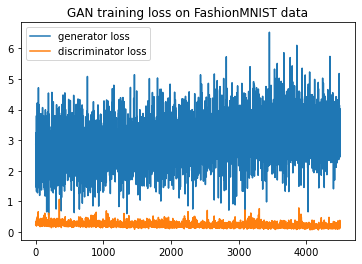

In [47]:
plt.title('GAN training loss on {} data'.format(config.dataset))
plt.plot(g_loss_list, label='generator loss')   
plt.plot(d_loss_list, label='discriminator loss')
plt.legend()
plt.show()

## Result

In [15]:
for image_path in os.listdir(save_path):
    if image_path.endswith('.png'):
        plt.figure(figsize=(5,5))
        image = Image.open(os.path.join(save_path, image_path))
        plt.title(image_path)
        plt.imshow(image)
        plt.show()

TypeError: unsupported operand type(s) for -: 'range' and 'int'